In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import joblib

loading the training data

In [10]:
import pandas as pd

# Load the CSV file
train_data = pd.read_csv(
    r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\GUIDE_Train.csv"
)



In [11]:
train_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,164,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,NaN,NaN,MailMessage,Impacted,98799,138268,360606,160396,441377,270,425863,453297,153085,22919,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,NaN,NaN,Ip,Related,98799,138268,465,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


Data understanding

In [12]:
# list of the all column names in the DataFrame
list(train_data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [13]:
#pandas to display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)

In [14]:
train_data.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3


In [15]:
train_data.shape

(9516837, 45)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

Data Preprocessing

In [17]:
# check for percentage of  missing values
(train_data.isnull().sum()/(len(train_data)))*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.460120
IncidentGrade          0.539465
ActionGrouped         99.410897
ActionGranular        99.410897
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.982729
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [18]:
# removing 50% above null value
threshold= len(train_data)* 0.5   
train_data=train_data.dropna(thresh=threshold,axis=1)

In [19]:
train_data.shape

(9516837, 35)

In [20]:
#check for duplicates
train_data.duplicated().sum()

np.int64(546298)

In [21]:
train_data.drop_duplicates(inplace=True)

In [22]:
train_data.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         47734
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [23]:
#since incident grade is our target we cannot fill null values with unknown values as it mislead training 
train_data["IncidentGrade"].fillna(train_data["IncidentGrade"].mode()[0],inplace=True) # fill mode values for IncidentGrade

In [24]:
train_data.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive'], dtype=object)

In [25]:
#standardize  as proper datetime values
train_data['Timestamp']=pd.to_datetime(train_data['Timestamp']) 

In [26]:
train_data['Timestamp'].head()

0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [27]:
#changing to pandas datetime format
train_data["Day"]=train_data["Timestamp"].dt.day
train_data["Month"]=train_data["Timestamp"].dt.month
train_data["Year"]=train_data["Timestamp"].dt.year
train_data["Hour"]=train_data["Timestamp"].dt.hour
train_data["Time"]=train_data["Timestamp"].dt.time
     

In [28]:
train_data.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
print(train_data.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  DeviceId  \
0      InitialAccess    TruePositive         Ip      Related     98799   
1       Exfiltration   FalsePositive       User     Impacted     98799   
2      InitialAccess   FalsePositive        Url      Related     98799   
3  CommandAndControl  BenignPositive        Url      Related     98799   
4          Execution    TruePositive       User     Impacted     98799   

   Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  \
0  138268         27  160396      441377      673

In [29]:
#calculate the frequency of each unique value in the 'IncidentGrade' 
train_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    3875534
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

In [30]:
train_data.Category.unique()

array(['InitialAccess', 'Exfiltration', 'CommandAndControl', 'Execution',
       'SuspiciousActivity', 'Impact', 'Collection', 'CredentialAccess',
       'Persistence', 'Discovery', 'Malware', 'DefenseEvasion', 'Exploit',
       'PrivilegeEscalation', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'CredentialStealing', 'WebExploit',
       'Weaponization'], dtype=object)

In [31]:
train_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

EDA (Explotary data analysis) and Data visualization

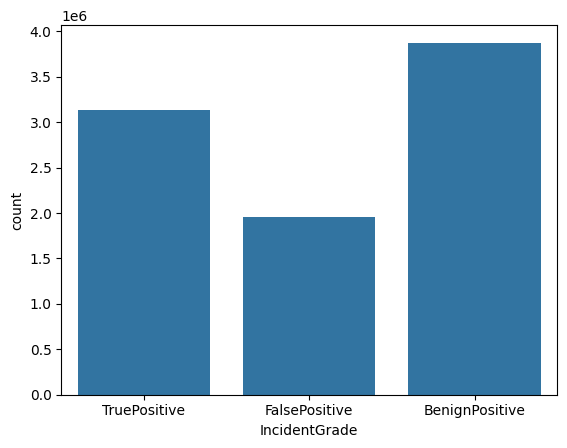

In [32]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=train_data)
plt.show()

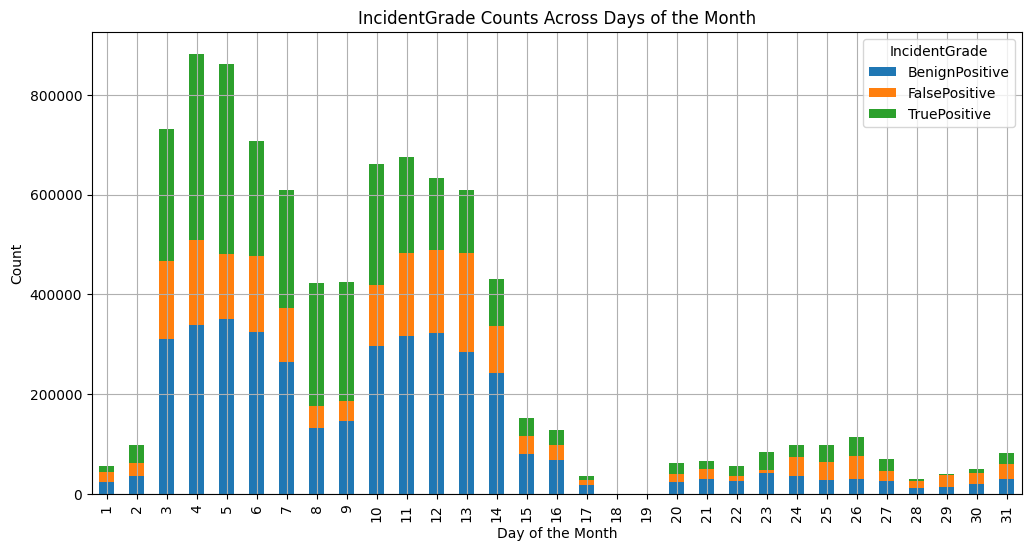

In [33]:
#aggregate the data, then creating a stacked bar plot to visualize the distribution of different IncidentGrade values across days of the month
day_incident_grade = train_data.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

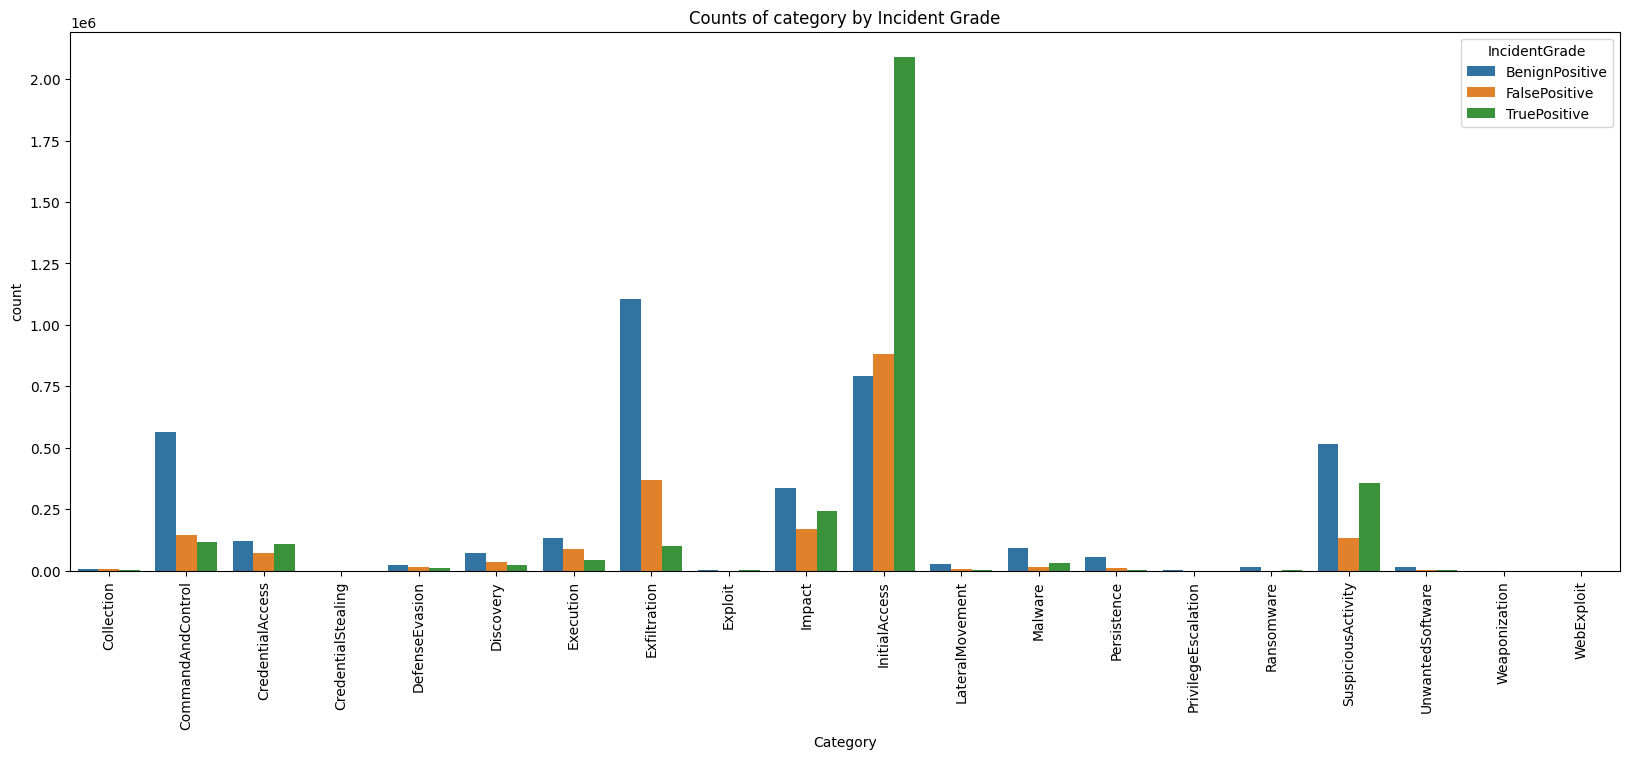

In [34]:
# Aggregate data
grouped_data=train_data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

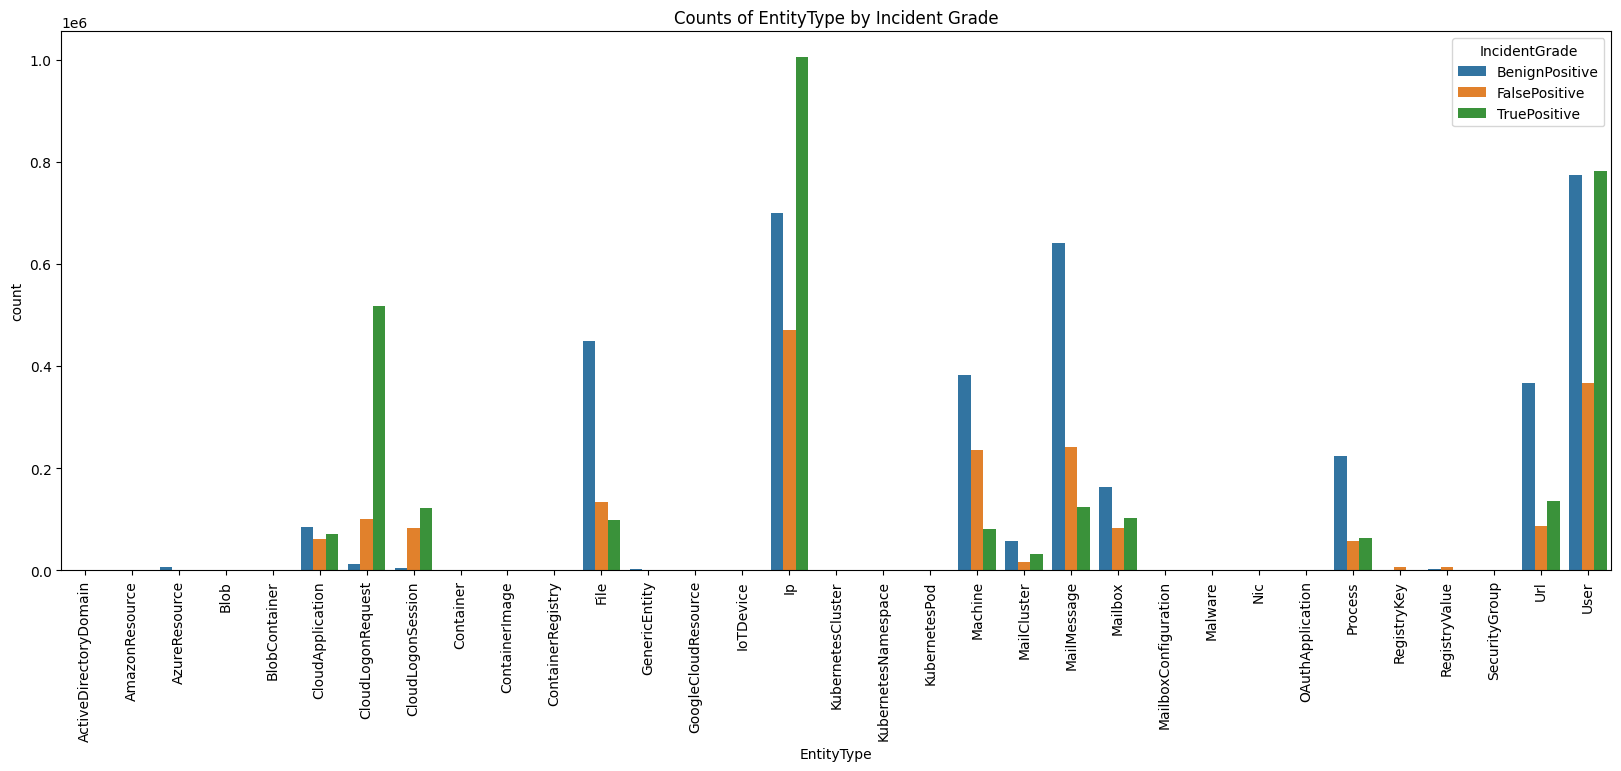

In [35]:
# Aggregate data
grouped_data=train_data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()

In [37]:
cols_to_drop = ["Month", "DeviceName", "DeviceId", "ResourceIdName", "Unnamed: 0", "OAuthApplicationId", "NetworkMessageId"]
existing_cols = [col for col in cols_to_drop if col in train_data.columns]
train_data.drop(existing_cols, axis=1, inplace=True)


In [38]:
train_data['State'].fillna(train_data['State'].mode()[0], inplace=True)
train_data['CountryCode'].fillna(train_data['CountryCode'].mode()[0], inplace=True)
train_data['City'].fillna(train_data['City'].mode()[0], inplace=True)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970539 entries, 0 to 9516836
Data columns (total 33 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Id                 int64 
 1   OrgId              int64 
 2   IncidentId         int64 
 3   AlertId            int64 
 4   DetectorId         int64 
 5   AlertTitle         int64 
 6   Category           object
 7   IncidentGrade      object
 8   EntityType         object
 9   EvidenceRole       object
 10  Sha256             int64 
 11  IpAddress          int64 
 12  Url                int64 
 13  AccountSid         int64 
 14  AccountUpn         int64 
 15  AccountObjectId    int64 
 16  AccountName        int64 
 17  RegistryKey        int64 
 18  RegistryValueName  int64 
 19  RegistryValueData  int64 
 20  ApplicationId      int64 
 21  ApplicationName    int64 
 22  FileName           int64 
 23  FolderPath         int64 
 24  OSFamily           int64 
 25  OSVersion          int64 
 26  CountryCode        

Feature selection and correlation

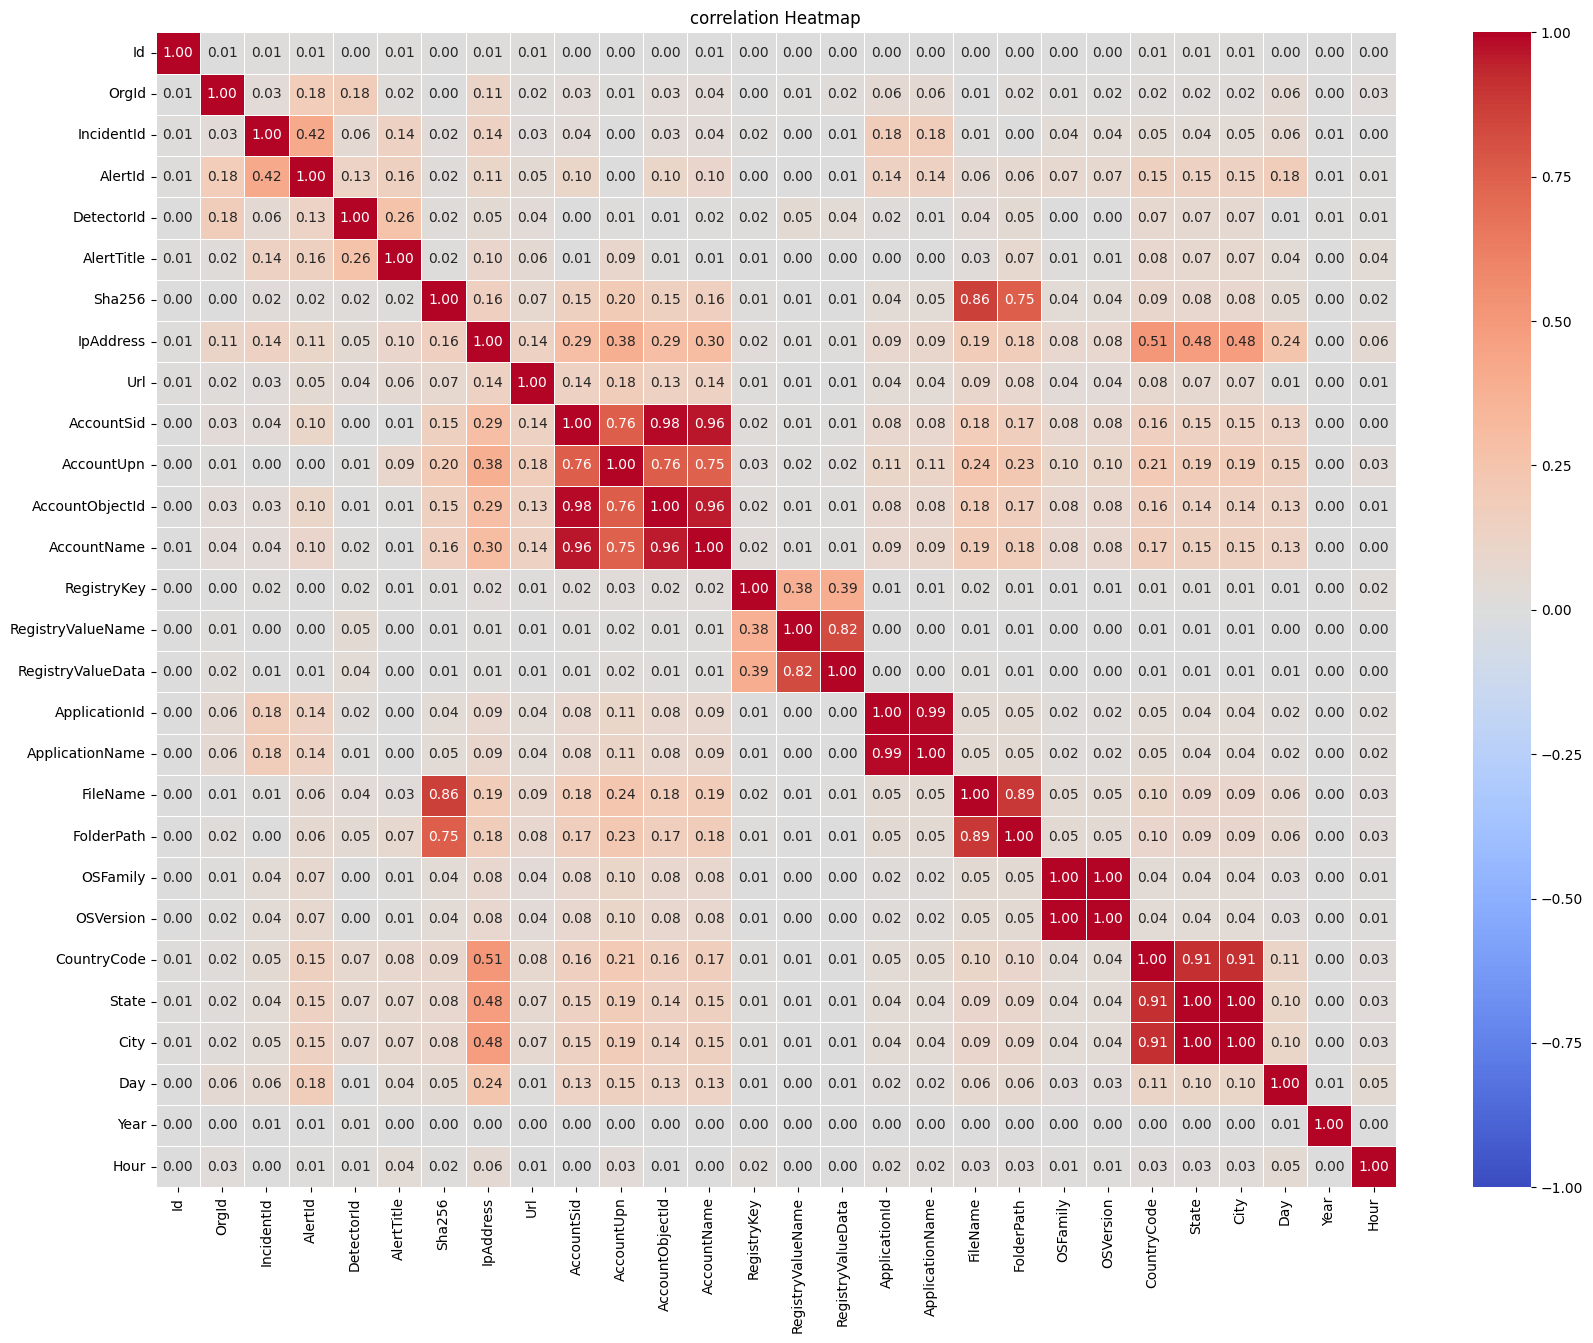

In [40]:
# selecting numerical col
numeric_df=train_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [45]:
cols_to_drop = [
    "CountryCode", "Sha256", "ApplicationName", "RegistryValueName",
    "AccountSid", "AccountObjectId", "FolderPath", "AccountUpn"
]

existing_cols = [col for col in cols_to_drop if col in train_data.columns]
train_data.drop(existing_cols, axis=1, inplace=True)


In [52]:
# dropping 70% above correlated columns safely
train_data.drop(
    ["RegistryKey", "RegistryValueData", "DetectorId", "Id"],
    axis=1,
    inplace=True,
    errors='ignore'   # 👈 prevents KeyError if columns are missing
)


In [53]:
# dropping 70% above correlated columns
train_data.drop(["OSFamily", "OSVersion", "State", "FileName", "AccountName"], axis=1, inplace=True, errors='ignore')


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970539 entries, 0 to 9516836
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 1.0+ GB


Encoding

In [55]:
train_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [56]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

In [57]:
#label encoding 
encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    train_data[i]=le.fit_transform(train_data[i])
    encoders[i]=le

In [58]:
train_data

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,0,612,123247,6,10,2,15,1,27,160396,2251,3,4,2024,6,21915
1,88,326,210035,43,7,1,32,0,360606,160396,2251,10630,14,2024,3,10885
2,809,58352,712507,298,10,1,31,1,360606,68652,2251,10630,13,2024,4,17575
3,92,32992,774301,2,1,0,31,1,360606,13,2251,10630,10,2024,16,59976
4,148,4359,188041,74,6,2,32,0,360606,160396,2251,10630,15,2024,1,4087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,0,90,496631,6,10,2,6,1,360606,160396,2251,10630,8,2024,15,55568
9516833,59,196410,748366,2,1,0,31,1,360606,164,2251,10630,6,2024,9,34808
9516834,44,14117,7425,57,7,0,21,0,360606,160396,2251,10630,11,2024,22,82263
9516835,43,644,8973,10,9,0,15,1,465,160396,2251,10630,20,2024,23,82861


In [59]:
train_data.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [60]:
# Save the cleaned dataset to your OneDrive folder
train_data.to_csv(
    r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\encoded_train_data.csv",
    index=False
)


loading the testing data

In [ ]:
import pandas as pd
test_data = pd.read_csv(r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\GUIDE_Test.csv")


C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\1474513019.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\GUIDE_Test.csv")


In [3]:
test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [4]:
list(test_data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [5]:
pd.set_option('display.max_columns', None)
test_data.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [6]:
test_data.shape

(4147992, 46)

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [8]:
#check for missing values
test_data.isnull().sum()/len(test_data)*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       55.619779
IncidentGrade          0.000000
ActionGrouped         99.953881
ActionGranular        99.953881
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.994526
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [9]:
#handle null values
threshold= len(test_data)* 0.5   # removing 50% above null value
test_data=test_data.dropna(thresh=threshold,axis=1)

In [10]:
test_data.shape

(4147992, 36)

In [11]:
test_data.duplicated().sum()

np.int64(225297)

In [ ]:
test_data.drop_duplicates(inplace=True)

C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\715455084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(inplace=True)


In [13]:
test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,2024-06-03T20:24:41.000Z,135,7322,Malware,BenignPositive,Machine,Impacted,4,138268,360606,160396,441377,673934,425863,453297,4,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public


In [14]:
#mode imputation because of catagorial columns

test_data["IncidentGrade"].fillna(test_data["IncidentGrade"].mode()[0],inplace=True)

C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3898626374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["IncidentGrade"].fillna(test_data["IncidentGrade"].mode()[0],inplace=True)
C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3898626374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Inc

In [16]:
test_data['Timestamp']=pd.to_datetime(test_data['Timestamp']) # data clean Timestamp

C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\2113304963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Timestamp']=pd.to_datetime(test_data['Timestamp']) # data clean Timestamp


In [17]:
test_data['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [18]:
test_data["Day"]=test_data["Timestamp"].dt.day
test_data["Month"]=test_data["Timestamp"].dt.month
test_data["Year"]=test_data["Timestamp"].dt.year
test_data["Hour"]=test_data["Timestamp"].dt.hour
test_data["Time"]=test_data["Timestamp"].dt.time

C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3407314541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Day"]=test_data["Timestamp"].dt.day
C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3407314541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Month"]=test_data["Timestamp"].dt.month
C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3407314541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [19]:
[features for features in test_data.columns if test_data[features].isnull().sum()>0]

[]

In [20]:
test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,2024-06-03 20:24:41+00:00,135,7322,Malware,BenignPositive,Machine,Impacted,4,138268,360606,160396,441377,673934,425863,453297,4,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,20,20:24:41
4147987,541165881145,262,3017,227156,2024-06-04 03:53:15+00:00,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,4,6,2024,3,03:53:15
4147988,438086666953,1323,31001,304819,2024-06-04 19:32:19+00:00,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,19,19:32:19
4147989,1297080124487,47,3653,7243,2024-06-15 00:50:22+00:00,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,15,6,2024,0,00:50:22


In [21]:
test_data.drop("Timestamp",axis=1,inplace=True)  # dropping timestamp column
print(test_data.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category   IncidentGrade         EntityType EvidenceRole  \
0    LateralMovement  BenignPositive               User     Impacted   
1  CommandAndControl  BenignPositive            Machine     Impacted   
2    LateralMovement  BenignPositive            Process      Related   
3      InitialAccess   FalsePositive  CloudLogonSession      Related   
4          Discovery  BenignPositive               User     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799  138268     360606  160396        2610        3699   
1 

C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\4005129164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop("Timestamp",axis=1,inplace=True)  # dropping timestamp column


In [22]:
pd.set_option("display.max_columns", None)
test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05


In [23]:
test_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [24]:
test_data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

visualization of data

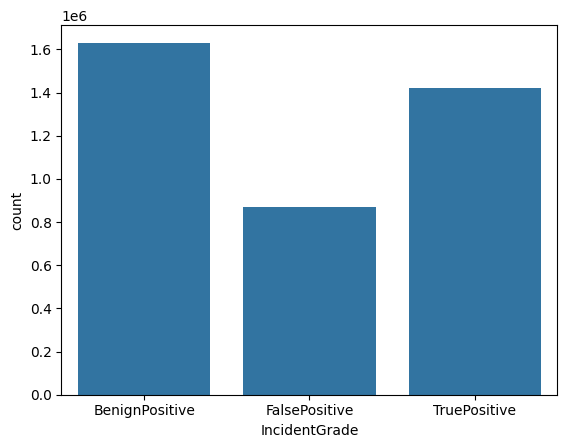

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.countplot(x="IncidentGrade", data=test_data)
plt.show()


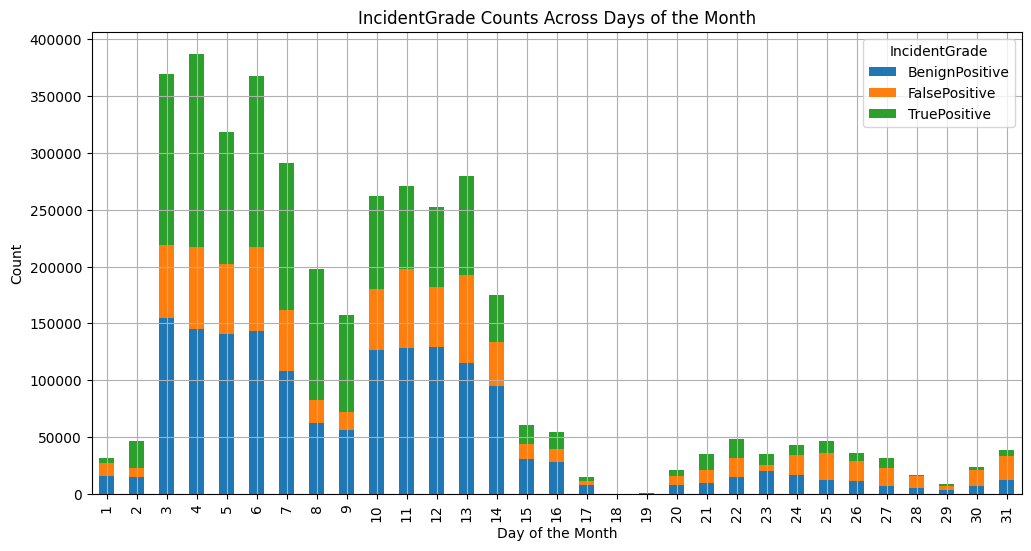

In [28]:
# Aggregate data
day_incident_grade = test_data.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

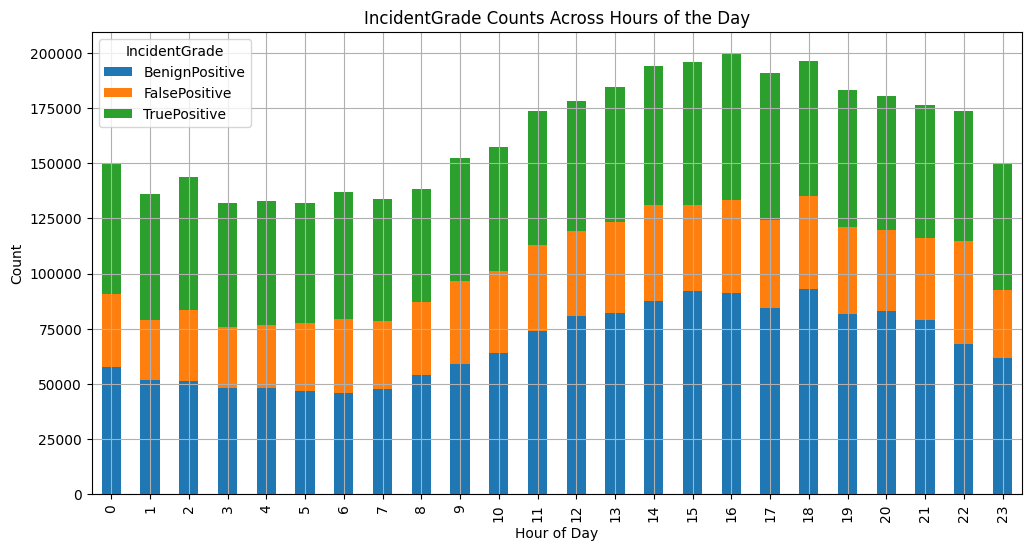

In [29]:
# Aggregate data

hour_incident =test_data.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()

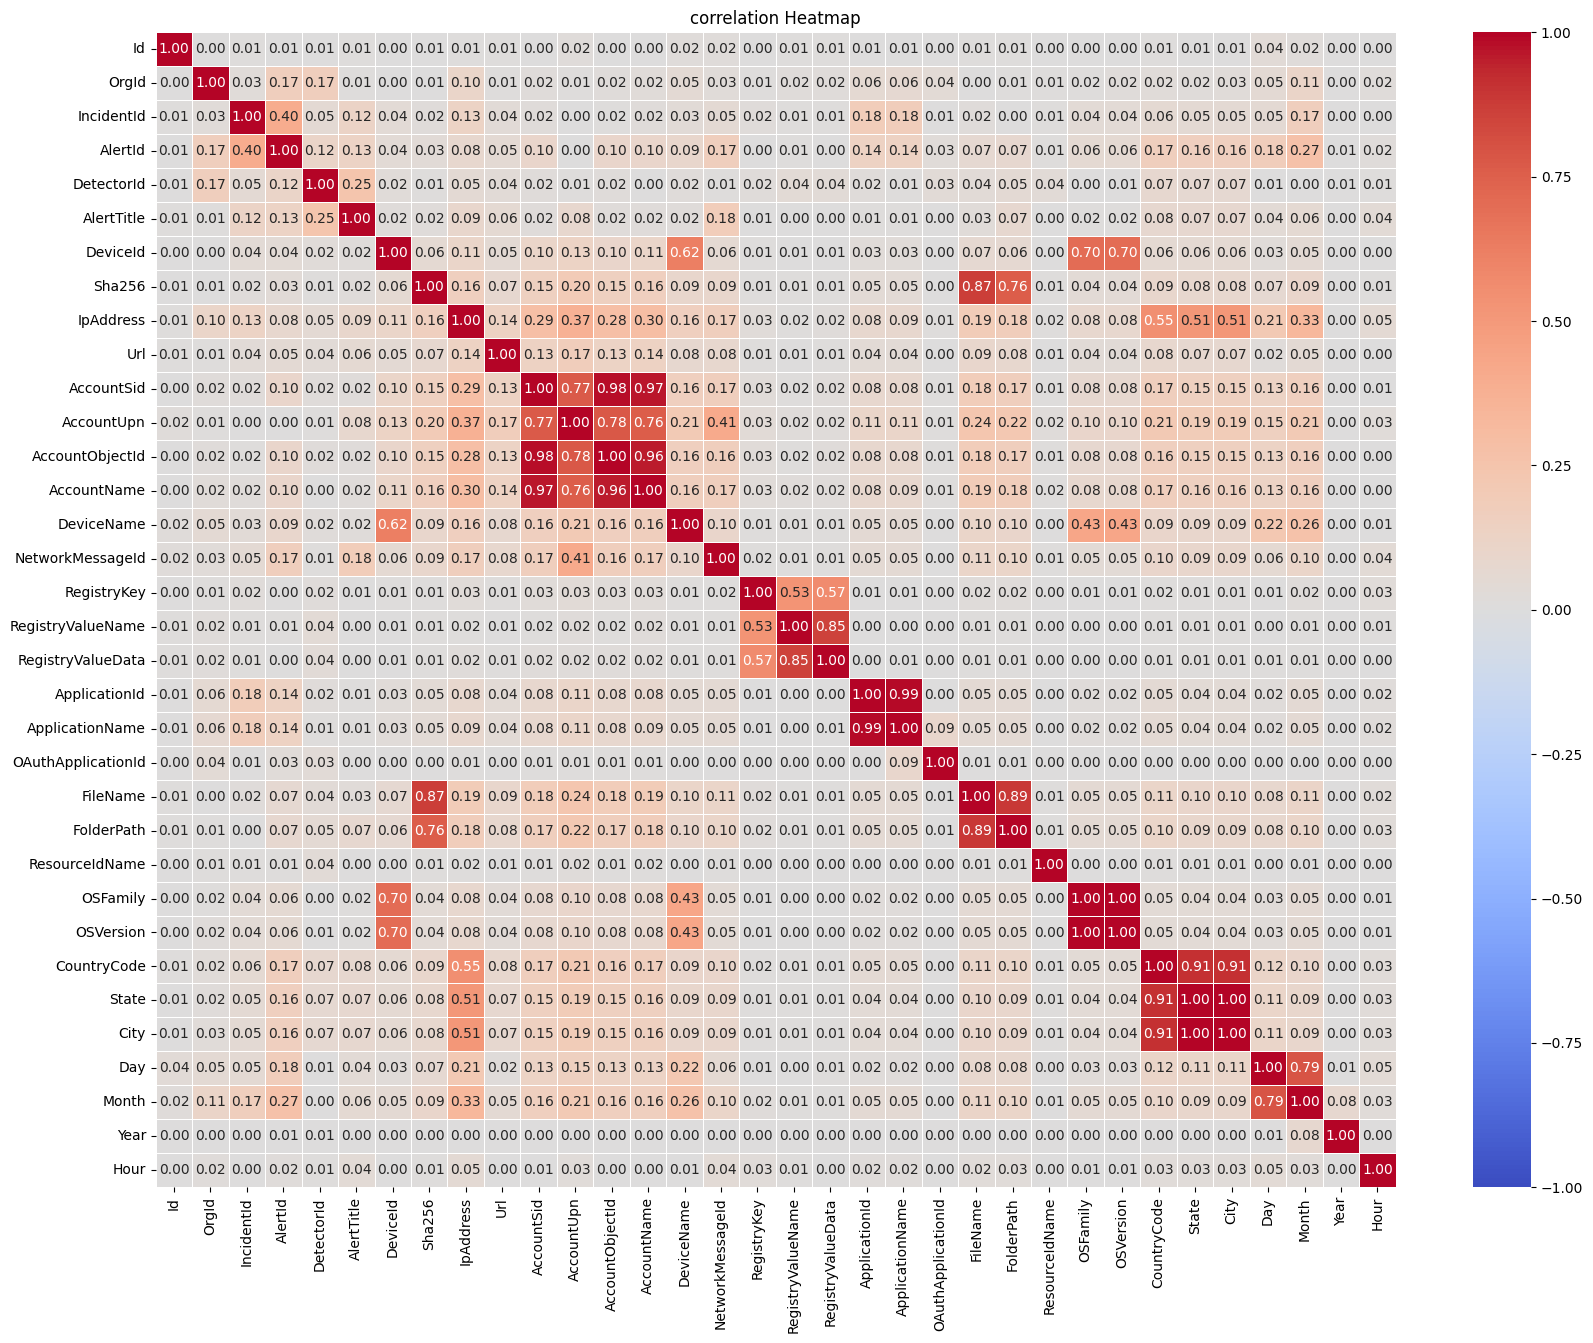

In [30]:
# selecting numerical col
numeric_df=test_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [31]:
# dropping 70% above correlated columns
test_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\1526748272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)


In [32]:
test_data.shape

(3922695, 29)

encoding

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 29 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  IpAddress           int64 
 12  Url                 int64 
 13  AccountName         int64 
 14  DeviceName          int64 
 15  NetworkMessageId    int64 
 16  RegistryKey         int64 
 17  RegistryValueData   int64 
 18  ApplicationId       int64 
 19  OAuthApplicationId  int64 
 20  FileName            int64 
 21  ResourceIdName      int64 
 22  City                int64 
 23  Usage               object
 24  Day                 int32 
 25  Month               int

In [34]:
test_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [35]:
Categorical_colts=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time']

In [37]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for i in Categorical_colts:
    le = LabelEncoder()
    test_data[i] = le.fit_transform(test_data[i])
    encoders[i] = le


C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3934484324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[i] = le.fit_transform(test_data[i])
C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3934484324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[i] = le.fit_transform(test_data[i])
C:\Users\Nithin Srinivaas\AppData\Local\Temp\ipykernel_9524\3934484324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [38]:
test_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,135,7322,12,0,15,0,4,360606,160396,453297,4,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,20,73420
4147987,541165881145,262,3017,227156,139,120,10,0,28,0,98799,360606,160396,14567,153085,529644,1631,860,2251,881,289573,3586,10630,1,4,6,2024,3,13978
4147988,438086666953,1323,31001,304819,219,196,10,0,28,0,98799,360606,160396,107151,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,19,70279
4147989,1297080124487,47,3653,7243,57,29,1,1,12,1,98799,1084,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,15,6,2024,0,3020


In [39]:
test_data.select_dtypes(include=["int32", "int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'City', 'Usage',
       'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [40]:
test_data.to_csv(r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\encoded_test_data.csv", index=False)


In [41]:
#loading the saved files
train_data = pd.read_csv(r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\encoded_train_data.csv")

In [42]:
test_data = pd.read_csv(r"C:\Users\Nithin Srinivaas\OneDrive\Documents\Cybersecurity_Machine Learning\encoded_test_data.csv")

In [43]:
print(train_data.shape)
print(test_data.shape)

(8970539, 16)
(3922695, 29)


In [44]:
# aligns train_data and test_data
train_data, test_data = train_data.align(test_data, join='left', axis=1)
test_data.fillna(0, inplace=True)

In [45]:
print(train_data.shape)
print(test_data.shape)

(8970539, 16)
(3922695, 16)


In [46]:
test_data = test_data.reset_index(drop=True)

In [48]:
import joblib

# Saving the data using Joblib
joblib.dump(test_data, 'encoded_test_data1.joblib')


['encoded_test_data1.joblib']

In [49]:
joblib.dump(train_data, 'encoded_train_data1.joblib')

['encoded_train_data1.joblib']

In [50]:
# Loading the data using Joblib
test_data = joblib.load('encoded_test_data1.joblib')

In [51]:
test_data.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,657,11767,87199,563,11,0,28,0,360606,160396,2251,10630,4,2024,22,82520
1,3,91158,632273,2,1,0,15,0,360606,160396,2251,10630,3,2024,12,46649
2,145,32247,131719,10807,11,0,23,1,360606,160396,2251,10630,8,2024,3,12037
3,222,15294,917686,0,10,1,7,1,360606,160396,2251,10630,12,2024,12,43594
4,363,7615,5944,18,5,0,28,0,360606,160396,2251,10630,6,2024,17,63665


In [52]:
print(test_data.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

478.84473037719727 MB
